In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
hotel_df = pd.read_csv('hotel_bookings.csv')
print(hotel_df)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [3]:
print(hotel_df.shape)
print(hotel_df.isna().sum())

(119390, 32)
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
com

In [4]:
hotel_df=hotel_df.drop('company',axis=1)
print(hotel_df.shape)

(119390, 31)


In [5]:
print(hotel_df.isna().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [6]:
hotel_df = hotel_df.dropna()
print(hotel_df.isna().sum())
print(hotel_df.shape)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [7]:
print(hotel_df['reservation_status'].value_counts())

Check-Out    62733
Canceled     39158
No-Show       1003
Name: reservation_status, dtype: int64


In [8]:
hotel_df = hotel_df.drop(['reservation_status','reservation_status_date'], axis=1)

In [9]:
print(hotel_df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')


In [10]:
print(hotel_df['is_canceled'].value_counts())

0    62733
1    40161
Name: is_canceled, dtype: int64


<AxesSubplot:xlabel='is_canceled', ylabel='Count'>

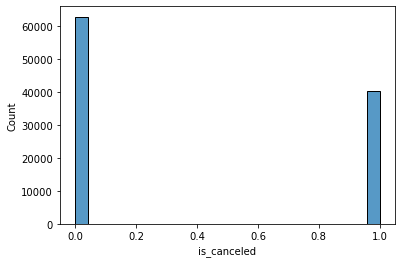

In [11]:
import seaborn as sns
sns.histplot(hotel_df['is_canceled'])

In [25]:
#target value is is_canceled from which we have to predict whether the customer will going to cancel the hotel booking or not
X = hotel_df.drop('is_canceled', axis=1)
y = hotel_df['is_canceled'].copy()

In [13]:
print(X.shape)

(102894, 28)


In [14]:
print(y.shape)

(102894,)


In [15]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = 'gini',max_depth=290)

In [16]:
from sklearn.preprocessing import OrdinalEncoder
numeric_cols = hotel_df.select_dtypes(include=np.number).columns.tolist()
object_cols = list(set(hotel_df.columns) - set(numeric_cols))
enc = OrdinalEncoder()
enc.fit(hotel_df[object_cols])
hotel_df[object_cols] = enc.fit_transform(hotel_df[object_cols])

In [17]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
dt_acc = []
for train_index, test_index in skf.split(X, y):
    train = hotel_df.iloc[train_index,:]
    test = hotel_df.iloc[test_index,:]
    X_train = train.drop('is_canceled', axis=1)
    y_train = train['is_canceled'].copy()
    X_test = test.drop('is_canceled', axis=1)
    y_test = test['is_canceled'].copy()
    decision_tree.fit(X_train, y_train)
    dt_acc.append(decision_tree.score(X_test, y_test))
  

In [18]:
print(dt_acc)

[0.8465911851887847, 0.8465425919626804, 0.8498955245638758, 0.8526167452257155, 0.8524152006997765]


In [19]:
decision_tree_entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth=290)

In [20]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
dt_acc_entropy = []
for train_index, test_index in skf.split(X, y):
    train = hotel_df.iloc[train_index,:]
    test = hotel_df.iloc[test_index,:]
    X_train = train.drop('is_canceled', axis=1)
    y_train = train['is_canceled'].copy()
    X_test = test.drop('is_canceled', axis=1)
    y_test = test['is_canceled'].copy()
    decision_tree_entropy.fit(X_train, y_train)
    dt_acc_entropy.append(decision_tree.score(X_test, y_test))
  

In [21]:
print(dt_acc_entropy)

[0.9963069148160746, 0.9963069148160746, 0.9959181690072404, 0.9960639486855533, 0.8524152006997765]


In [22]:
print("Mean Gini DT accuracy = "+str(np.mean(dt_acc)))

Mean Gini DT accuracy = 0.8496122495281666


In [23]:
print("Mean Entropy DT accuracy = "+str(np.mean(dt_acc_entropy)))

Mean Entropy DT accuracy = 0.9674022296049438


In [24]:
### So Entropy performs better than GINI